In [1]:
# Packages
import numpy as np
import requests
import json
import yfinance as yf
from pandas_datareader.data import DataReader
import datetime
# from datetime import date
# from datetime import timedelta # Date & time functionality
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_datareader as pdr

In [2]:
# Key questions
# Wallet performance
# Which stocks to buy (lowest performing) and which to sell (highest performing)?

# Snapshot of the markets, similar to keytrade UI (Major EU/NA stock indices live performance)
# Bull - bear market: 2 months 20% up or 20% down respectively (SP, DJ ...)

# PortefeuilleRA = RA(Portefeuille)
# PortefeuilleGraph = graphRA(PortefeuilleRA)

# Shares insights: market cap evolution, shares dilution, dividends
#

# Create finance package?
# Make functions more robust

In [2]:
# Constants
start = datetime.date.today()-datetime.timedelta(days=365)
end = datetime.date.today() # Default: today

# Test
VastgoedEUR = ['VGP.BR','WDP.BR','AED.BR','VASTN.AS','WHA.AS','LI.PA','VNA.DE','DWNI.DE','SGRO.L','SPSN.SW','LAND.L','URW.AS','PSPN.SW','GFC.PA','LEG.DE','BLND.L']
VastgoedUS = ['SPG','O']

# Fractional stocks
ExpertPicks = ['BAR.BR','ACKB.BR','DEME.BR','DIE.BR','UCB.BR','ABI.BR','REC.BR','SOLB.BR',
       'GBLB.BR','MELE.BR','MSFT','ASML.AS','MC.PA','GOOG','ROG.SW','SAN.PA','BRK-B',
       'SGO.PA','CRBN.AS','AALB.AS']

# Bolero KBC securities picks https://www.youtube.com/watch?v=K5UBXq7nGIc
KBCPicks = ['ACKB.BR','TINC.BR','VGP.BR','AED.BR','ADYEN.AS','AGS.BR','AD.AS','DIE.BR','ARGX.BR','FAGR.BR','UCB.BR','TWEKA.AS',
          'BEKB.BR','UMI.BR','KIN.BR','MTLS']

# DeGroof Petercam https://www.degroofpetercam.com/nl-be/blog/favoriete-aandelen-degroof-petercam-2023?sub=1&utm_campaign=be_traffic_all_weekly&ls=L&utm_medium=email&utm_source=blog
DGPPicks = ['ABI.BR','ASM.AS','BAR.BR','TKWY.AS','KIN.BR','FAGR.BR','IBA.BR','MONT.BR','UCB.BR','RET.BR']


# Europe
BEL20 = ['ABI.BR','ACKB.BR','AED.BR','AGS.BR','APAM.AS','ARGX.BR','BAR.BR','COFB.BR','DIE.BR','ELI.BR','GLPG.AS','GBLB.BR','KBC.BR',
         'MELE.BR','PROX.BR','SOF.BR','SOLB.BR','UCB.BR','UMI.BR','WDP.BR']
BELMID = ['AGFB.BR','ASCE.BR','AZE.BR','BEKB.BR','BPOST.BR','BREB.BR','CPINV.BR','COLR.BR','DECB.BR','DEME.BR',
          'ECONB.BR','EURN','EVS.BR','EXM.BR','FAGR.BR','GIMB.BR','HOMI.BR','IBAB.BR','INTO.BR','KIN.BR',
          'LOTB.BR','MONT.BR','ONTEX.BR','OBEL.BR','RECT.BR','RET.BR','SHUR.BR','SIP.BR','TNET.BR','TESB.BR',
          'TINC.BR','VGP.BR','XIOR.BR'] # 'COMB.BR',
BELSMALL = ['ATEB.BR','BCART.BR','BTLS.BR','CFEB.BR','OPTI.BR','EKOP.BR','GREEN.BR','HYSG.BR','IMMO.BR','JEN.BR',
            'MDXH.BR','MITRA.BR','BNB.BR','NEXTA.BR','NYXH.BR','ONWD.BR','QRF.BR','ROU.BR','SEQUA.BR','SMAR.BR',
            'UPG.BR','VAN.BR','VASTB.BR','WEHB.BR','WHATS.BR'] # 'BDB.BE','HYL.BR','QFG.BR','TEXF.BR','WEB.BR'.
AEX = ['ADYEN.AS','AGN.AS','AD.AS','AKZA.AS','MT.AS','ASM.AS','ASML.AS','UMG.AS','BESI.AS','DSM.AS','HEIA.AS','IMCD.AS','INGA.AS','TKWY.AS','KPN.AS','NN.AS','PHIA.AS','PRX.AS',
       'RAND.AS','REN.AS','SHELL.AS','LIGHT.AS','URW.AS','UNA.AS','WKL.AS']
DAX = ['ADS.DE','AIR.DE','ALV.DE','BAS.DE','BAYN.DE','BEI.DE','BMW.DE','BNR.DE','CON.DE','1COV.DE','DTG.DE','DBK.DE','DB1.DE',
       'DPW.DE','DTE.DE','EOAN.DE','FRE.DE','FME.DE','HNR1.DE','HEI.DE','HEN3.DE','IFX.DE','LIN.DE','MBG.DE','MRK.DE','MTX.DE',
       'MUV2.DE','PAH3.DE','PUM.DE','QIA.DE','RWE.DE','SAP.DE','SRT3.DE','SIE.DE','ENR.DE','SHL.DE','SY1.DE','VOW3.DE','VNA.DE',
       'ZAL.DE']
CAC40 = ['AI.PA','AIR.PA','ALO.PA','MT.AS','CS.PA','BNP.PA','EN.PA','CAP.PA','CA.PA','ACA.PA','BN.PA','DSY.PA','ENGI.PA',
         'EL.PA','ERF.PA','RMS.PA','KER.PA','OR.PA','LR.PA','MC.PA','ML.PA','ORA.PA','RI.PA','PUB.PA','RNO.PA','SAF.PA',
         'SGO.PA','SAN.PA','SU.PA','GLE.PA','STLA.PA','STM.PA','TEP.PA','HO.PA','TTE.PA','URW.AS','VIE.PA','DG.PA','VIV.PA',
         'WLN.PA']
Eur50 = ['ADS.DE','ADYEN.AS','AD.AS','AI.PA','AIR.PA','ALV.DE','ABI.BR','ASML.AS','CS.PA','BAS.DE','BAYN.DE','BBVA.MC','SAN.MC',
         'BMW.DE','BNP.PA','CRG.IR','BN.PA','DB1.DE','DPW.DE','DTE.DE','ENEL.MI','ENI.MI','EL.PA','FLTR.IR','RMS.PA','IBE.MC',
         'ITX.MC','IFX.DE','INGA.AS','ISP.MI','KER.PA','KNEBV.HE','OR.PA','LIN.DE','MC.PA','MBG.DE','MUV2.DE','RI.PA','PHIA.AS',
         'PRX.AS','SAF.PA','SAN.PA','SAP.DE','SU.PA','SIE.DE','STLAM.MI','TTE.PA','DG.PA','VOW.DE','VNA.DE']
FTSE = ['III.L','ABDN.L','ADM.L','AAF.L','AAL.L','ANTO.L','AHT.L','ABF.L','AZN.L','AUTO.L','AV.L','BME.L','BA.L','BARC.L',
        'BDEV.L','BEZ.L','BKG.L','BP.L','BATS.L','BLND.L','BT-A.L','BNZL.L','BRBY.L','CNA.L','CCH.L','CPG.L','CTEC.L','CRH.L',
        'CRDA.L','DCC.L','DGE.L','EDV.L','ENT.L','EXPN.L','FCIT.L','FLTR.L','FRAS.L','FRES.L','GLEN.L','GSK.L','HLN.L',
        'HLMA.L','HL.L','HSX.L','HSBA.L','IHG.L','IMB.L','INF.L','IAG.L','ITRK.L','JD.L','JMAT.L','KGF.L','LAND.L','LGEN.L',
        'LLOY.L','LSEG.L','MNG.L','MRO.L','MNDI.L','NG.L','NWG.L','NXT.L','OCDO.L','PSON.L','PSH.L','PSN.L','PHNX.L','PRU.L',
        'RKT.L','REL.L','RTO.L','RMV.L','RIO.L','RR.L','RS1.L','SGE.L','SBRY.L','SDR.L','SMT.L','SGRO.L','SVT.L','SHEL.L',
        'SMDS.L','SMIN.L','SN.L','SKG.L','SPX.L','SSE.L','STAN.L','STJ.L','TW.L','TSCO.L','ULVR.L','UU.L','UTG.L','VOD.L',
        'WEIR.L','WTB.L','WPP.L']

# North America
SP500_1 = ['ZTS','ZION','ZBRA','ZBH','YUM','XYL','XRAY','XOM','XEL','WYNN',
           'WY','WTW','WST','WRK','WRB','WMT','WMB','WM','WHR','WFC',
           'WELL','WEC','WDC','WBD','WBA','WAT','WAB','VZ','VTRS','VTR',
           'VRTX','VRSN','VRSK','VMC','VLO','VICI','VFC','V','USB','URI',
           'UPS','UNP','UNH','ULTA','UHS','UDR','UAL','TYL','TXT','TXN',
           'TTWO','TT','TSN','TSLA','TSCO','TRV','TROW','TRMB','TRGP','TPR',
           'TMUS','TMO','TJX','TGT','TFX','TFC','TER','TEL','TECH','TDY',
           'TDG','TAP','T','SYY','SYK','SYF','SWKS','SWK','STZ','STX',
           'STT','STLD','STE','SRE','SPGI','SPG','SO','SNPS','SNA','SLB',
           'SJM','SHW','SEE','SEDG','SCHW','SBUX','SBAC','RTX','RSG','ROST',
           'ROP','ROL','ROK','RMD','RL','RJF','RHI','RF','REGN','REG',
           'RE','RCL','QRVO','QCOM','PYPL','PXD','PWR','PTC','PSX','PSA',
           'PRU','PPL','PPG','POOL','PODD','PNW','PNR','PNC','PM','PLD',
           'PKI','PKG','PHM','PH','PGR','PG','PFG','PFE','PEP','PEG',
           'PEAK','PCG','PCAR','PAYX','PAYC','PARA','OXY','OTIS','ORLY','ORCL',
           'ON','OMC','OKE','OGN','ODFL','O','NXPI','NWSA','NWS','NWL',
           'NVR','NVDA','NUE','NTRS','NTAP','NSC','NRG','NOW','NOC','NKE',
           'NI','NFLX','NEM','NEE','NDSN','NDAQ','NCLH','MU','MTD','MTCH',
           'MTB','MSI','MSFT','MSCI','MS','MRO','MRNA','MRK','MPWR','MPC',
           'MOS','MOH','MO','MNST','MMM','MMC','MLM','MKTX','MKC','MHK',
           'MGM','META','MET','MDT','MDLZ','MCO','MCK','MCHP','MCD','MAS',
           'MAR','MAA','MA','LYV','LYB','LW','LVS','LUV','LRCX','LOW',
           'LNT','LNC','LMT','LLY','LKQ','LIN','LHX','LH','LEN','LDOS',
           'L','KR','KO','KMX','KMI','KMB','KLAC','KIM','KHC','KEYS',
           'KEY','KDP','K','JPM','JNPR','JNJ','JKHY','JCI','JBHT','J',
           'IVZ','ITW','IT','ISRG','IRM','IR']
SP500_2 = ['IQV','IPG','IP','INVH','INTU','INTC','INCY','ILMN','IFF','IEX', #10
           'IDXX','ICE','IBM','HWM','HUM','HSY','HST','HSIC','HRL','HPQ', #20
           'HPE','HON','HOLX','HLT','HII','HIG','HES','HD','HCA','HBAN', #30
           'HAS','HAL','GWW','GS','GRMN','GPN','GPC','GOOGL','GOOG','GNRC', #40
           'GM','GLW','GL','GIS','GILD','GEN','GEHC','GE','GD','FTV', #50
           'FTNT','FSLR','FRT','FOXA','FOX','FMC','FLT','FITB','FIS', #FISV is not in YH finance, similar to NDX
           'FICO','FFIV','FE','FDX','FDS','FCX','FAST','FANG','F','EXR',
           'EXPE','EXPD','EXC','EW','EVRG','ETSY','ETR','ETN','ESS','ES',
           'EQT','EQR','EQIX','EPAM','EOG','ENPH','EMR','EMN','ELV','EL',
           'EIX','EFX','ED','ECL','EBAY','EA','DXCM','DXC','DVN','DVA',
           'DUK','DTE','DRI','DPZ','DOW','DOV','DLTR','DLR','DISH','DIS',
           'DHR','DHI','DGX','DG','DFS','DE','DD','DAL','D','CZR',
           'CVX','CVS','CTVA','CTSH','CTRA','CTLT','CTAS','CSX','CSGP',
         'CSCO','CRM','CRL','CPT','CPRT','CPB','COST','COP','COO','COF','CNP','CNC','CMS','CMI','CMG','CME','CMCSA','CMA',
         'CLX','CL','CINF','CI','CHTR','CHRW','CHD','CFG','CF','CEG','CE','CDW','CDNS','CDAY','CCL','CCI','CBRE','CBOE','CB',
         'CAT','CARR','CAH','CAG','C','BXP','BWA','BSX','BRO','BRK-B','BR','BMY','BLK','BKR','BKNG','BK','BIO','BIIB','BG','BF-B',
         'BEN','BDX','BBY','BBWI','BAX','BALL','BAC','BA','AZO','AXP','AWK','AVY','AVGO','AVB','ATVI','ATO','ARE','APTV',
         'APH','APD','APA','AOS','AON','ANSS','ANET','AMZN','AMT','AMP','AMGN','AME','AMD','AMCR','AMAT','ALLE','ALL','ALK',
         'ALGN','ALB','AKAM','AJG','AIZ','AIG','AFL','AES','AEP','AEE','ADSK','ADP','ADM','ADI','ADBE','ACN','ACGL','ABT',
         'ABC','ABBV','AXON','AAPL','AAP','AAL','A'] 
RecentAdditionSP500 = ['GEHC']
DJIA = ['MMM','AXP','AMGN','AAPL','BA','CAT','CVX','CSCO','KO','DOW','GS','HD','HON','INTC','IBM','JNJ','JPM','MCD','MRK',
        'MSFT','NKE','PG','CRM','TRV','UNH','VZ','V','WBA','WMT','DIS']
NDX = ['ATVI','ADBE','ADP','ABNB','ALGN','GOOGL','GOOG','AMZN','AMD','AEP',
       'AMGN','ADI','ANSS','AAPL','AMAT','ASML','AZN','TEAM','ADSK','BKR',
       'BIIB','BKNG','AVGO','CDNS','CHTR','CTAS','CSCO','CTSH','CMCSA','CEG',
       'CPRT','CSGP','COST','CRWD','CSX','DDOG','DXCM','FANG','DLTR','EBAY',
       'EA','ENPH','EXC','FAST','FTNT','GILD','GFS','HON','IDXX', # FISV is missing in YH finance prior to May 30, 2023
       'ILMN','INTC','INTU','ISRG','JD','KDP','KLAC','KHC','LRCX','LCID',
       'LULU','MAR','MRVL','MELI','META','MCHP','MU','MSFT','MRNA','MDLZ',
       'MNST','NFLX','NVDA','NXPI','ORLY','ODFL','PCAR','PANW','PAYX','PYPL',
       'PEP','PDD','QCOM','REGN','RIVN','ROST','SGEN','SIRI','SBUX','SNPS',
       'TMUS','TSLA','TXN','VRSK','VRTX','WBA','WBD','WDAY','XEL','ZM',
       'ZS']

# South America


# Asia
HangSeng = ['0005.HK','0011.HK','0388.HK','0939.HK','1299.HK','1398.HK','2318.HK','2388.HK','2628.HK','3968.HK','3988.HK',
            '0002.HK','0003.HK','0006.HK','1038.HK','2688.HK','0012.HK','0016.HK','0017.HK','0101.HK','0688.HK','0823.HK',
            '0960.HK','1109.HK','1113.HK','1997.HK','2007.HK','6098.HK','0001.HK','0027.HK','0066.HK','0175.HK','0241.HK',
            '0267.HK','0288.HK','0291.HK','0316.HK','0386.HK','0669.HK','0700.HK','0762.HK','0857.HK','0868.HK','0881.HK',
            '0883.HK','0941.HK','0968.HK','0981.HK','0992.HK','1044.HK','1088.HK','1093.HK','1177.HK','1211.HK','1378.HK',
            '1810.HK','1876.HK','1928.HK','1929.HK','2020.HK','2269.HK','2313.HK','2319.HK','2331.HK','2382.HK','3690.HK',
            '3692.HK','6862.HK','9618.HK','9633.HK','9888.HK','9988.HK','9999.HK']
Nikkei225 = []
Nifty50 = ['ADANIPORTS.NS','APOLLOHOSP.NS','ASIANPAINT.NS','AXISBANK.NS','BAJAJ-AUTO.NS','BAJFINANCE.NS','BAJAJFINSV.NS',
           'BHARTIARTL.NS','BPCL.NS','BRITANNIA.NS','CIPLA.NS','COALINDIA.NS','DIVISLAB.NS','DRREDDY.NS','EICHERMOT.NS',
           'GRASIM.NS','HCLTECH.NS','HDFC.NS','HDFCBANK.NS','HDFCLIFE.NS','HEROMOTOCO.NS','HINDALCO.NS','HINDUNILVR.NS',
           'ICICIBANK.NS','INDUSINDBK.NS','INFY.NS','ITC.NS','JSWSTEEL.NS','KOTAKBANK.NS','LT.NS','M&M.NS','MARUTI.NS',
           'NESTLEIND.NS','NTPC.NS','ONGC.NS','POWERGRID.NS','RELIANCE.NS','SBIN.NS','SBILIFE.NS','SUNPHARMA.NS',
           'TATAMOTORS.NS','TATASTEEL.NS','TCS.NS','TATACONSUM.NS','TECHM.NS','TITAN.NS','ULTRACEMCO.NS','UPL.NS','WIPRO.NS']
BSE_Sensex = []
Russia = ['AFKS.ME','AFLT.ME','AGRO.ME','AKRN.ME','CBOM.ME','DSKY.ME','CHMF.ME','DIXY.ME','FEES.ME','GAZP.ME',
          'GMKN.ME','HYDR.ME','IRAO.ME','MGNT.ME','MOEX.ME','MSNG.ME','MTLR.ME',
          'ALRS.ME','MTSS.ME','MVID.ME','NVTK.ME','PHOR.ME','PIKK.ME','PLZL.ME','POLY.ME','ROSN.ME',
          'RSTI.ME','RTKM.ME','SBER.ME','SBERP.ME','SNGS.ME','SNGSP.ME','TATN.ME','TATNP.ME',
          'TRMK.ME','TRNFP.ME','UPRO.ME','RNFT.ME','UWGN.ME','VTBR.ME','YNDX.ME','LSRG.ME','MAGN.ME','LKOH.ME','NLMK.ME']
RecentAdditionRussia = ['LNTA.ME','MFON.ME','NMPT.ME','RUALR.ME','EPLN.ME']
Saudi = ['4334.SR','4345.SR','8250.SR','4322.SR','8312.SR','1322.SR','2300.SR','9526.SR','1201.SR','4290.SR','7200.SR',
         '2082.SR','4130.SR','8180.SR','1120.SR','4340.SR','4007.SR','2320.SR','6020.SR','4191.SR','1214.SR','3091.SR',
         '3008.SR','1304.SR','8280.SR','4001.SR','1820.SR','1111.SR','2222.SR','1302.SR','4210.SR','4170.SR','1202.SR',
         '4006.SR','2250.SR','8210.SR','3010.SR','7010.SR','4003.SR','4030.SR','4344.SR','2330.SR','6050.SR',
         '8200.SR','4336.SR','4161.SR','5110.SR','4348.SR']
RecentAdditionSaudi = ['2381.SR','6015.SR','7204.SR']

# Africa

Portefeuille = ['VWCE.DE', # MSCI World
                'AD.AS','IMCD.AS','APAM.AS','ASML.AS',
                'ONTEX.BR','SEQUA.BR','ARGX.BR','DIE.BR','KIN.BR','ECONB.BR','DEME.BR','CFEB.BR',
                'VNA.DE',
                'MAAT.PA','SAN.PA',
                'LTAM.SW', #Latin America
                '^AEX', #AEX distributing
                '^NDX', #Nasdaq100
                '^GSPC', #SP500
                'EXSA.DE', #EuroStoxx distributing
                'EEM', #Emerging markets
                'MCHI', #China
                'NKE','NVDA','PG','GPRO','BTC-USD','BYDDY','AAPL','GOOG','AMZN','MSFT','META',
                'INR.PA', #India ETF
                ]


In [3]:
# Create a dict structure that holds all European indices
Experts2023 = {"VastgoedEUR":VastgoedEUR,
              "VastgoedUS":VastgoedUS,
              "ExpertPicks":ExpertPicks,
              "KBCPicks":KBCPicks,
              "DGPPicks":DGPPicks}
Europe = {"BEL20":BEL20,
         "BELMID":BELMID,
         "BELSMALL":BELSMALL,
         "AEX":AEX,
         "DAX":DAX,
         "CAC40":CAC40,
         "Eur50":Eur50,
         "FTSE":FTSE}
NA = {"SP500_1":SP500_1,
     "SP500_2":SP500_2,
     "DJ":DJIA,
     "NDX":NDX}
Asia = {"HangSeng":HangSeng,
        "Nifty50":Nifty50,
        "Russia":Russia,
        "Saudi":Saudi}
All = {"Europe":Europe,
      "North America":NA,
      "Experts":Experts2023,
      "Asia":Asia}
All = json.dumps(All)
print(All)

IndentationError: unexpected indent (264821303.py, line 3)

In [3]:
# Function to get relative performance in past 30, 90 and 360 days
# history needs a list of tickers, optional arguments are start and end date
# Returns a dataframe with data for each ticker 
def history(ticker):
    try:
        df = yf.download(ticker)
        # print("Successfully downloaded at",datetime.datetime.now())
    except:
        raise Exception("The Yahoo API found no data, symbol may be delisted.")
    # finally:
    #    print("Done processing.")
    return

# To catch errors: 
# 1 If ticker does not exist, no data will be returned
# 2 If ticker is recently added, dataframe does not contain more than 30d/90d/360d
def historicPerformance (index,start=datetime.date.today()-datetime.timedelta(days=365),end=datetime.date.today()):
    # Create empty dataframe with Date, Ticker, CurrentValue, 30D, 90D and 360D columns
    result = pd.DataFrame(columns=['Date','Ticker','Close',#'7D'
                                '7D%',#'30D',
                                '30D%',#'90D',
                                '90D%',#'360D',
                                '360D%'])

    for ticker in index:
        # Using yahoo finance, download the 
        df = yf.download(ticker,start=start,end=end)
        # Forward fill weekend/holidays with previous value
        df = df.asfreq(freq='D',method='ffill')
        #print(df.head())
        rows = []
        rows.append(
            {'Date': end,
            'Ticker': ticker,
            'Close': df.iloc[-1]['Close'],
            #'7D': df.iloc[-7]['Close'],
            '7D%': (df.iloc[-1]['Close'] - df.iloc[-7]['Close']) / df.iloc[-7]['Close'] * 100,
            #'30D': df.iloc[-30]['Close'],
            '30D%': (df.iloc[-1]['Close'] - df.iloc[-30]['Close']) / df.iloc[-30]['Close'] * 100,
            #'90D': df.iloc[-90]['Close'],
            '90D%': (df.iloc[-1]['Close'] - df.iloc[-90]['Close']) / df.iloc[-90]['Close'] * 100,
            #'360D': df.iloc[0]['Close'],
            '360D%': (df.iloc[-1]['Close'] - df.iloc[0]['Close']) / df.iloc[0]['Close'] * 100
            })
        rows = pd.DataFrame(rows)
        result = pd.concat([result,rows])
        
    return result

# Function to get rolling average for 50D and 200D
# RA needs a list of tickers, optional arguments are start and end date
# Returns a dataframe with data for each ticker 
# TO DO: Optional arguments, define start to when ticker started
def RA(index):
    # Create an empty pandas dataframe with 4 columns
    result = pd.DataFrame(columns=['Ticker','Close','SMA50','SMA200'])
    # Set index with datetime data type
    pd.Index(result,dtype='datetime64[ns]')

    # Loop over all tickers in the BEL20 list
    for ticker in index:
        # Download the data for each ticker using yahoo finance package
        data = yf.download(ticker)
        # Subset only Close column
        data = data[['Close']]
        # Use last value for entries when stock exchange is closed, weekend, holidays
        data = data.asfreq(freq='D',method='ffill')
        # Add a ticker column
        data['Ticker'] = ticker
        # Make a rolling average column for 50 days and use at least 1 period to calculate the average
        data['SMA50'] = data['Close'].rolling(50,min_periods=1).mean()
        # Make a rolling average column for 200 days and use at least 1 period to calculate the average
        data['SMA200'] = data['Close'].rolling(200,min_periods=1).mean()
        # Add the data dataframe to the result dataframe
        result = pd.concat([data,result])
    return result

# Function to get normalized closing prices 
# normalized needs a list of tickers, optional arguments are start and end date
# Returns a dataframe with data for each ticker 
def normalized(index,start=datetime.date.today()-datetime.timedelta(days=365),end=datetime.date.today()):

    result = pd.DataFrame(columns=['Ticker','Close','CloseNorm'])

    for ticker in index:
        df = yf.download(ticker, start=start,end=end)
        df = df[['Close']]
        df = df.asfreq(freq='D',method='ffill')
        df['Ticker'] = ticker
        firstPrice = df.Close.iloc[0]
        #Normalize to day0
        df['CloseNorm']=df['Close'].div(firstPrice).mul(100)
        result = pd.concat([df,result])
    return result

# Function to get graph of rolling average for 50D and 200D 
# Requires output of RA()
# Include into graph also x-axis limits
def graphRA(df, start=datetime.date.today()-datetime.timedelta(days=365),end=datetime.date.today()):
    df = df.reset_index()
    df_pivot = pd.melt(df, id_vars=['index','Ticker'],value_vars=['Close','SMA50','SMA200'])
    df_pivot = df_pivot[(df_pivot['index']>np.datetime64(start)) & (df_pivot['index']<=np.datetime64(end))]
    plot = sns.relplot(data=df_pivot,x='index',y='value',hue='variable',col='Ticker',col_wrap=4,kind='line',facet_kws={'sharex':False,'sharey':False})
    return plot

In [4]:
# To run weekly: SP500_1, SP500_2, NDX, Eur50, FTSE, BEL20, BELMID, BELSMALL
Test = BEL20
TestHistory = historicPerformance(Test) #, start=datetime.date.today()-datetime.timedelta(days=395),end=datetime.date.today()-datetime.timedelta(days=30))
print('Best performing tickers in past 7 days \n',TestHistory.sort_values('7D%',ascending=False).head(),'\n \n')
print('Worst performing tickers in past 7 days \n',TestHistory.sort_values('7D%',ascending=False).tail(),'\n \n')
print('Best performing tickers in past 30 days \n',TestHistory.sort_values('30D%',ascending=False).head(),'\n \n')
print('Worst performing tickers in past 30 days \n',TestHistory.sort_values('30D%',ascending=False).tail(),'\n \n')
print('Best performing tickers in past 90 days \n',TestHistory.sort_values('90D%',ascending=False).head(),'\n \n')
print('Worst performing tickers in past 90 days \n',TestHistory.sort_values('90D%',ascending=False).tail(),'\n \n')
print('Best performing tickers in past 360 days \n',TestHistory.sort_values('360D%',ascending=False).head(),'\n \n')
print('Worst performing tickers in past 360 days \n',TestHistory.sort_values('360D%',ascending=False).tail(),'\n \n')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [7]:
# To run weekly: SP500_1, SP500_2, NDX, Eur50, FTSE, BEL20, BELMID
Test = NDX
TestHistory = historicPerformance(Test) #, start=datetime.date.today()-datetime.timedelta(days=395),end=datetime.date.today()-datetime.timedelta(days=30))

print('Best performing tickers in past 7 days \n',TestHistory.sort_values('7D%',ascending=False).head(head),'\n \n')
# print('Worst performing tickers in past 7 days \n',TestHistory.sort_values('7D%',ascending=False).tail(head),'\n \n')
print('Best performing tickers in past 30 days \n',TestHistory.sort_values('30D%',ascending=False).head(head),'\n \n')
# print('Worst performing tickers in past 30 days \n',TestHistory.sort_values('30D%',ascending=False).tail(head),'\n \n')
print('Best performing tickers in past 90 days \n',TestHistory.sort_values('90D%',ascending=False).head(head),'\n \n')
# print('Worst performing tickers in past 90 days \n',TestHistory.sort_values('90D%',ascending=False).tail(head),'\n \n')
print('Best performing tickers in past 360 days \n',TestHistory.sort_values('360D%',ascending=False).head(head),'\n \n')
# print('Worst performing tickers in past 360 days \n',TestHistory.sort_values('360D%',ascending=False).tail(head),'\n \n')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

IndexError: single positional indexer is out-of-bounds

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

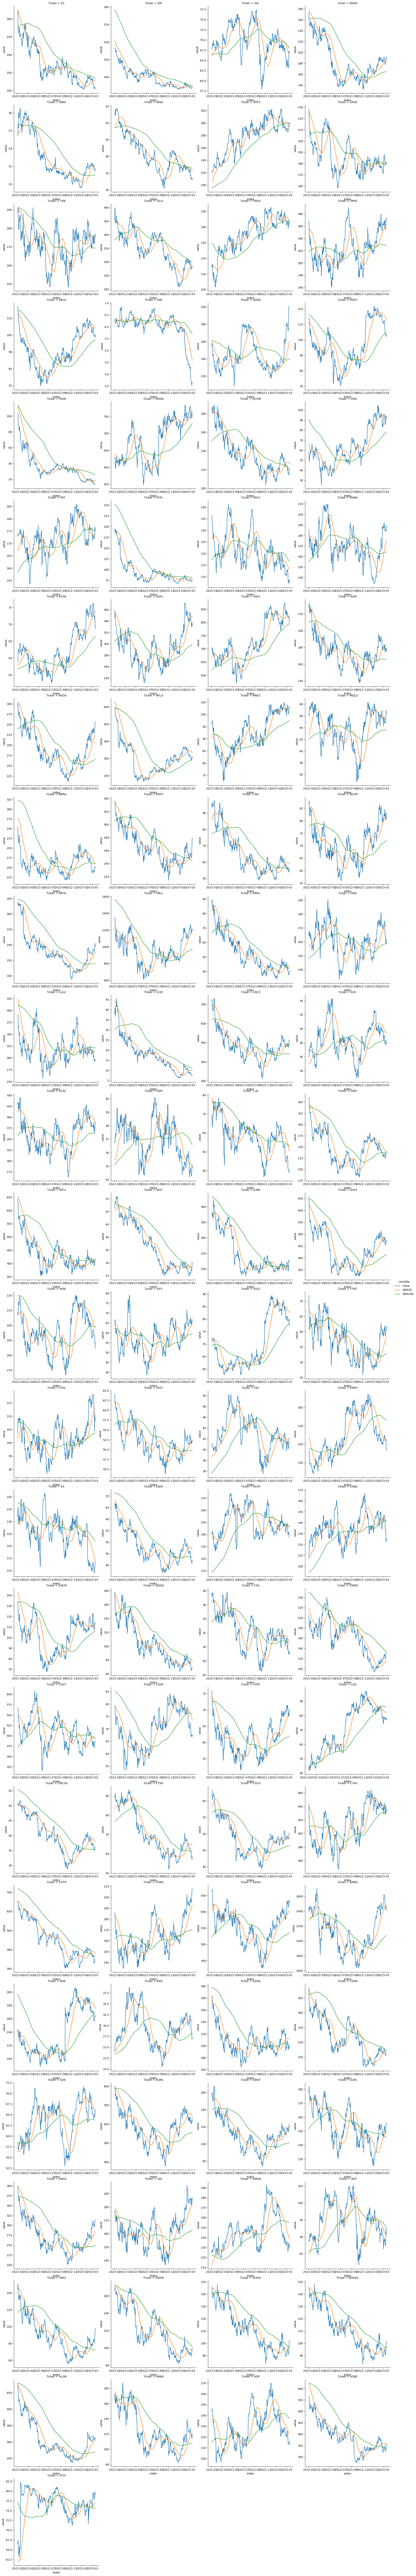

In [7]:
# Test = Portefeuille
TestRA = RA(NDX)
TestRAGraph = graphRA(TestRA,'2022-01-01','2023-03-19')

In [11]:
# source: https://pypi.org/project/yfinance/
result = pd.DataFrame(columns=['Ticker','Date','Close','Dividends','Dividend yield'])

for ticker in Portefeuille:
    df = yf.Ticker(ticker)
    df = df.historicPerformance(start=start,end=end)
    # df.index = df.index.date
    df = df.reset_index()
    df = df[['Close','Dividends','Date']]
    # df = df.asfreq(freq='D',method='ffill')
    df['Ticker'] = ticker
    # Filter only days with divididends
    df = df[df['Dividends']!=0]
    df['Dividend yield'] = df['Dividends'].div(df['Close']).mul(100)
    result = pd.concat([df,result])
# return result

In [10]:
data = yf.download("PG")

[*********************100%***********************]  1 of 1 completed


In [12]:
print(result.sort_values('Dividend yield',ascending=False))

          Close  Dividends                       Date    Ticker  \
97     7.620000      0.800  2022-06-01 00:00:00+02:00  ONTEX.BR   
75    35.930000      1.660  2022-05-02 00:00:00+02:00    VNA.DE   
118    3.340000      0.140  2022-06-30 00:00:00+02:00  ECONB.BR   
79    97.050003      3.330  2022-05-06 00:00:00+02:00    SAN.PA   
66    27.995937      0.520  2022-04-19 00:00:00+02:00     AD.AS   
154   28.478937      0.500  2022-08-19 00:00:00+02:00   APAM.AS   
149   27.105000      0.460  2022-08-12 00:00:00+02:00     AD.AS   
215   29.559999      0.500  2022-11-14 00:00:00+01:00   APAM.AS   
230   38.590000      0.584  2022-12-13 00:00:00-05:00       EEM   
84    33.298218      0.500  2022-05-13 00:00:00+02:00   APAM.AS   
230   48.020000      0.712  2022-12-13 00:00:00-05:00      MCHI   
101  156.399994      2.100  2022-06-07 00:00:00+02:00    DIE.BR   
77   137.750000      1.620  2022-05-04 00:00:00+02:00   IMCD.AS   
33    45.707695      0.500  2022-03-01 00:00:00+01:00   APAM.A

In [31]:
msft.set_index('Date')

AttributeError: 'Ticker' object has no attribute 'set_index'

In [86]:
# show share count
test = yf.Ticker('VNA.DE')
print(test.shares)
# No shares

None


In [ ]:
# show financials:
# - income statement
# msft.income_stmt
# msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show major holders
msft.major_holders

# show institutional holders
msft.institutional_holders

# show mutualfund holders
msft.mutualfund_holders

# show earnings
msft.earnings
msft.quarterly_earnings

# show sustainability
msft.sustainability

In [ ]:
# show analysts recommendations
msft.recommendations
# msft.recommendations_summary
# show analysts other work
# msft.analyst_price_target
msft.revenue_forecasts
msft.earnings_forecasts
msft.earnings_trend

# show next event (earnings, etc)
msft.calendar

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts